# Machine Learning & Statistics Project 2020
By Kevin Dooley

![image](wind.png)

### Project Objective
To create a web service that uses machine learning to make predictions based on the data set, `powerproduction` which is saved in this repository. The goal is to produce a model that accurately predicts wind turbine poweroutput from windspeed values, as in the data set. You must then develop a web service that will respond with predicted power values based on speed values sent as HTTP requests.

### Background on Wind Energy & Power

Wind energy refers to the process of creating electricity o rmechanical power using the wind, or air flows that occur naturally in the earth’s atmosphere. Modern wind turbines are used to capture kinetic energy from the wind and generate electricity. [7]

Wind energy provides a clean and sustainable solution to our energy problems. It can be used as an alternative to fossil fuels in generating electricity, without the direct emission of greenhouse gases. Wind will always be inexhaustible and shoudl be utilised. Wind energy is currently the largest contributing resource of renewable energy in Ireland. It is both Ireland’s largest and cheapest renewable electricity resource. [8]

### How Wind Turbines Work
Wind turbines work on a simple principle, as the name suggests, they use wind to make electricity. Wind turns the propeller blades of a turbine around a rotor. That rotor then spins a generator which in turn creates electricity. There is aerodynamic force created from the rotation of rotor blades. These are connected to the generator. The translation of aerodynamic force to rotation of a then generator creates electricity. 

### Modelling  Wind energy
The modelling of wind energy is a very important aspect of the process as you do not have a definite or known amount of energy that will be returned at all times, it depends on numerous factors. Mainly the speed of wind. Wind energy system models can be used to predict on wind resource, electrical response/power generated and the returns of economic market. [10] They will be used to predict expected power output in this project. 

In [1]:
## import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
import tensorflow.keras as kr

#### Load Dataset
To be able to give an overview of the dataset, I had to first obtain it. Copied and saved the dataset from Moodle as a CSV file in my repository. This was saved as powerproduction.csv and was the basis of the project.

In [2]:
df = pd.read_csv("powerproduction.csv") #read the csv file using pandas
df # called the dataset df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [3]:
print("Rows x Columns:", df.shape)

Rows x Columns: (500, 2)


The powerproduction.csv has two variables: speed and power. There are also 500 rows in the dataset.

In [4]:
# glance at data - show first 5 rows
df.head()


,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [5]:
# glance at data - show last 5 rows
df.tail()

,speed,power
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


In [6]:
# glance at data - show 15 rows
df.sample(15)

,speed,power
36,1.652,7.221
465,23.373,104.977
27,1.101,0.121
11,0.576,5.241
328,16.692,89.527
10,0.551,6.498
98,5.205,0.932
322,16.441,89.134
31,1.301,0.000
210,10.661,26.927


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


By using these simple functions it is easy to do a overview comparision for both variables of the dataset. These functions do not really tell us much information but they do familarise us with the dataset. The first observation to make from the above is that there appears to be a power output of 0watt, when in fact there was substantial windspeed. This will need to be investigated further but you could make a reasonable assumption that there was an issue or downtime during these periods. Wind Turbines also shutdown automatically if wind speeds are too high and that may also be a contributing factor. 

In [8]:
#describe function to show statistical summary of the dataset
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


The statistical summary above gives us a top level look at the dataset. It can be seen that that the average wind speed is 12.59m/s and the average power output is 48.01MW.

### Plot Dataset

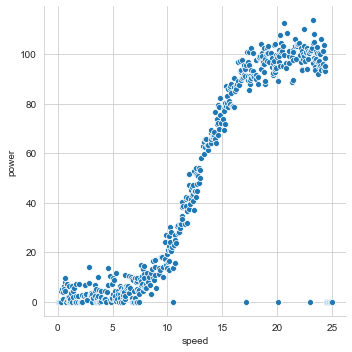

In [9]:
# https://seaborn.pydata.org/generated/seaborn.relplot.html
#scatterplot showing relationship wind v power
sns.set_style('whitegrid')
sns.relplot(x="speed", y="power",data=df)


Text(0.5, 1.0, 'Wind Speed vs Generated Power ')

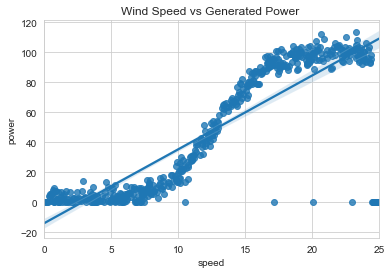

In [10]:
sns.set_style('whitegrid') 
reg = sns.regplot(x="speed", y="power",data=df)
reg.set_title("Wind Speed vs Generated Power ")

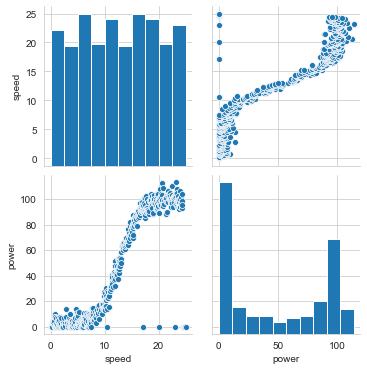

In [11]:
sns.pairplot(df)

The above relationship plots are clearly indicating that there are some outliers in the dataset. As mentioned above, the values for power generated are 0KW when the wind speed is up to 25m/s which indicates there was downtime either due to a known/unknown issue or maintenance. 

The graph below depicts the relationship between wind speed and power production. The graph illustrates typical wind turbine power curve in which you can determine the cut-in, nominal and cut-out speed. The cut-in speed (approx. 3.5m/s) is the minimum threshold wind speed must reach for the turbine to begin generating electricity. A turbine will achieve its nominal power output at appox. 12 - 14m/s and the turbine will reach its cut-out speed at approximately 25 m/s. The cut-out point means the turbine stops power production to protect itself from potentially damaging speeds. [11]

As can been seen in plots above, the 0MW power outputs close to 25m/s may in fact be as a result of the wind turbine coming close to its cut-out point rather than an issue or maintenance. As per the source above, the cut-off point is approx 25m/s but depending on the type and location of the turbine, one could assume that the cut-off point could vary slightly and based on the plots above, many of those 0KW power outputs occur from appox. 23.5m/s onwards. The other outliers from approx 10 - 20m/s would most likely be as a result of planned/unlanned maintenance. 
![image](wind_vs_power.png)

It is important that you complete data cleaning when doing data analysis. When completing a model or prediction, it is important to have accurate information. Data cleansing  improves your data quality by finding and eliminating errors in the data and in doing so, increases overall productivity. When you clean your data, all outdated, incorrect or misleading information is removed – leaving you with the highest quality information to then complete your analysis on. [12] 

This dataset has results in it that can be removed (cleaned up) i.e maintenance and wind-cut out speed. if we left these results in the dataset, it could lead to less accurate modelling and predictions.

In [12]:
# adapted from https://stackoverflow.com/questions/32067054/remove-rows-of-zeros-from-a-pandas-series
# remove unexpected zeros from dataset as these will zeros will make our modelling less accurate
# show values not equal 0
zero_removed = df[(df["speed"]!=0) & (df["power"]!=0)]
zero_removed


,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [13]:
# missing first zero of dataset
#need to incorporate as it is correct - 0 wind speed will give 0 output
zero_included = df[(df["speed"]==0) & (df["power"]==0)]
#zero_included

new_df = zero_included.append(zero_removed)
ds = new_df #new dataframe with zero added at the start 

#ds to be used as new dataset

Text(0.5, 1.0, 'Wind Speed vs Generated Power - Clean')

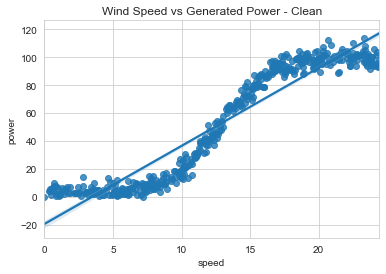

In [14]:
sns.set_style('whitegrid') 
reg = sns.regplot(x="speed", y="power",data=ds)
reg.set_title("Wind Speed vs Generated Power - Clean")

The unexpected zero results have now been removed from the dataset. You can see from both the plot and table above, the 0KW output datapoints have now been removed. The dataset has been cleaned up and it is now in a better state to complete data analysis on it. 

### Linear Regression

Linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). [4] Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). Basically that y can be calculated from a linear combination of the input variables (x). [5] In this instance, wind speed in the (x) input and power the (y) output variable. 

Before attempting to fit a linear model to observed data, you should first determine whether or not there is a relationship between the variables of interest, i.e wind energy and power. This does not necessarily imply that one variable causes the other but that there is some significant association between the two variables. A scatterplot can be a helpful tool (as seen above) in determining the strength of the relationship between two variables. If there appears to be a relationship between the proposed explanatory and dependent variables, then fitting a linear regression model to the data may be useful. If there is no relationship, it will most likely not be useful. [13]

There are two main ways to perform linear regression in Python — with Statsmodels and scikit-learn. In this example, I will use scikit-learn to complete the model assisted by numpy and pandas. Sk-Learn is one of the golden standard libraries when it comes to machine learning in Python and contains many packages, one of which is regression. To start it, you must first import the package - `import sklearn.linear_model as lm`.

The powerproduction dataset is suitable for a regression model because it contains two variables that can be measured at a continuous level. Based on the plots above, it appears that a linear regression could work but may no the the best fit and not provide meaningful or accurate data, possibly a polynomial regression fit model would work better. Linear regression will be examined though to determine its suitability. 

In [15]:
#lecture - link to repo
#create linear model instance
# adapted from https://realpython.com/linear-regression-in-python/
m = lm.LinearRegression()

In [16]:
#create x & y
x = ds["speed"]
y = ds["power"]

# x must be 2 dimensional. .reshape(-1,1) changes x to 2 dimensional (single column)
x = x.values.reshape(-1, 1)

#model to fit data
reg_model = m.fit(x,y)
reg_model

LinearRegression()

In [17]:
#intercept
m.intercept_

-19.636232996770858

In [18]:
#coefficient
m.coef_

array([5.60668469])

In [19]:
#how good is the model
m.score(x,y)

0.8983450728341917

In [20]:
#predict
predict = reg_model.predict(x)
predict

array([-19.636233  , -17.81406047, -17.39355912, -17.11322489,
       -16.82728397, -16.68711685, -16.54694973, -16.40678261,
       -16.12644838, -15.84611415, -15.70594703, -15.14527856,
       -15.00511144, -14.86494432, -14.44444297, -14.30427586,
       -14.16410874, -14.02394162, -13.74360739, -13.46327315,
       -13.18293892, -12.62227045, -12.48210333, -11.78126774,
       -11.64110063, -11.21499259, -10.37398989, -10.09365565,
        -9.11248583,  -8.97231871,  -7.43048042,  -7.15014619,
        -6.16897637,  -5.74847502,  -5.32236698,  -5.18219986,
        -4.48136428,  -3.78052869,  -3.64036157,  -3.0796931 ,
        -2.79935887,  -2.65919175,  -2.51902463,  -2.37885752,
        -1.67802193,  -0.69685211,  -0.55668499,  -0.41651787,
         0.14975728,   0.57025863,   0.71042575,   1.1309271 ,
         1.27109422,   2.25226404,   2.39243116,   2.53259827,
         2.67276539,   3.79410233,   4.49493792,   4.63510503,
         5.76204866,   5.90221577,   6.18255001,   6.88

In [21]:
#get y predict calculated manually
pred = m.intercept_ + m.coef_ * x
#pred

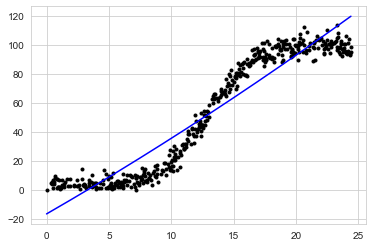

In [22]:
#link to repo lecture notes
#plot showing model in blue vs actual
x = ds["speed"].to_numpy()
y = ds["power"].to_numpy()

a,b,c = np.polyfit(x,y,2)
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x + b * x  +  c , 'b-');

In [23]:
# dataframe to compare actual vs predicted power for linear regression
compare = pd.DataFrame({'Wind Speed':x,'Actual Power': y, 'Predicted Power': predict})
compare

# compare.sample(15) to see random sample of dataset

,Wind Speed,Actual Power,Predicted Power
0,0.000,0.000,-19.636233
1,0.325,4.331,-17.814060
2,0.400,5.186,-17.393559
3,0.450,3.826,-17.113225
4,0.501,1.048,-16.827284
...,...,...,...
447,24.249,103.700,116.320264
448,24.299,93.694,116.600598
449,24.349,93.078,116.880933
450,24.374,98.223,117.021100


The table and plot above seems to indicate that linear regression may not be the most accurate model for this dataset as initially expected. The comparision shows that predicted powers are not very likely and the model is not a good fit. There are huge differences in actual vs predicted power output, if you look at index 450, the actual power is 98MW and the predicted is 117MW. The prediction power output yields a error of 19MW. For example, assuming the power measurement is `MW- Megawatt` (the usual output of wind turbines),the predicted error of 19MW could result in the company making poor choices that would most likely negatively affect the Wind Turbine Company, either economically or otherwise.  Examing indexes 447 - 451 all yield similiar differences between the actual vs predicted. 

The table also shows negative predicted powers when the wind speed is very incorrect. Even when wind speed is at 0m/s, the model predicts that the predicted power should be -19.6MW indicating the wind turbine consuming huge amounts of energy it is  while it is static. And while wind turbines do consume energy, it would not to be that significant. Overall, it can be concluded that linear regression is not the best fit model for this data and a more accurate model can be determined. 

## Neural Networks

In [24]:
ds1 = ds.values #values of clean dataset
ds1 

array([[0.00000e+00, 0.00000e+00],
       [3.25000e-01, 4.33100e+00],
       [4.00000e-01, 5.18600e+00],
       [4.50000e-01, 3.82600e+00],
       [5.01000e-01, 1.04800e+00],
       [5.26000e-01, 5.55300e+00],
       [5.51000e-01, 6.49800e+00],
       [5.76000e-01, 5.24100e+00],
       [6.26000e-01, 4.22000e+00],
       [6.76000e-01, 7.97400e+00],
       [7.01000e-01, 9.74600e+00],
       [8.01000e-01, 7.27100e+00],
       [8.26000e-01, 7.95000e-01],
       [8.51000e-01, 7.35000e+00],
       [9.26000e-01, 1.99600e+00],
       [9.51000e-01, 1.60900e+00],
       [9.76000e-01, 2.06400e+00],
       [1.00100e+00, 6.51100e+00],
       [1.05100e+00, 2.08500e+00],
       [1.10100e+00, 1.21000e-01],
       [1.15100e+00, 1.20800e+00],
       [1.25100e+00, 3.37300e+00],
       [1.27600e+00, 6.51000e+00],
       [1.40100e+00, 4.15600e+00],
       [1.42600e+00, 2.00500e+00],
       [1.50200e+00, 5.35200e+00],
       [1.65200e+00, 7.22100e+00],
       [1.70200e+00, 2.43900e+00],
       [1.87700e+00,

In [25]:
#https://stackoverflow.com/questions/57872755/what-is-1-in-python
# how to assign variables to each column
x = ds1[:,0]
y = ds1[:,-1]

#print(x) to see x values
#print(y) to y values

In [26]:
# adapted from lectures
# https://realpython.com/train-test-split-python-data/#the-importance-of-data-splitting
# trying to use train test for this model

# split dataset into train & test
# test sample size 0.25 for now. might adjust at later stage 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

# show train and test sample sizes
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(339,)
(339,)
(113,)
(113,)


In [27]:
# A sequential model
model = kr.models.Sequential()

In [33]:
# link to lecture notes
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile('adam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
_________________________________________________________________
dense_2 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 302
Trainable params: 302
Non-trainable params: 0
_________________________________________________________________


In [42]:
#run model on training data
neuron_model = model.fit(x_train, y_train, epochs=500, batch_size=10, validation_split = 0.2)
neuron_model 

Epoch 1/500
28/28 [==============================] - 0s 4ms/step - loss: 15.7374 - val_loss: 20.1539
Epoch 2/500
28/28 [==============================] - 0s 2ms/step - loss: 15.7847 - val_loss: 19.4668
Epoch 3/500
28/28 [==============================] - 0s 2ms/step - loss: 15.5657 - val_loss: 19.5401
Epoch 4/500
28/28 [==============================] - 0s 3ms/step - loss: 15.6438 - val_loss: 20.2842
Epoch 5/500
28/28 [==============================] - 0s 3ms/step - loss: 15.7438 - val_loss: 19.5231
Epoch 6/500
28/28 [==============================] - 0s 2ms/step - loss: 16.4734 - val_loss: 20.7909
Epoch 7/500
28/28 [==============================] - 0s 2ms/step - loss: 15.6390 - val_loss: 19.6034
Epoch 8/500
28/28 [==============================] - 0s 2ms/step - loss: 15.6502 - val_loss: 21.0721
Epoch 9/500
28/28 [==============================] - 0s 3ms/step - loss: 16.0494 - val_loss: 19.6088
Epoch 10/500
28/28 [==============================] - 0s 2ms/step - loss: 15.9902 - val_los

28/28 [==============================] - 0s 2ms/step - loss: 15.4965 - val_loss: 19.5060
Epoch 82/500
28/28 [==============================] - 0s 2ms/step - loss: 15.9907 - val_loss: 19.3749
Epoch 83/500
28/28 [==============================] - 0s 2ms/step - loss: 16.0778 - val_loss: 19.5278
Epoch 84/500
28/28 [==============================] - 0s 2ms/step - loss: 15.6244 - val_loss: 19.1075
Epoch 85/500
28/28 [==============================] - 0s 2ms/step - loss: 16.2180 - val_loss: 19.1585
Epoch 86/500
28/28 [==============================] - 0s 2ms/step - loss: 15.8946 - val_loss: 19.8449
Epoch 87/500
28/28 [==============================] - 0s 2ms/step - loss: 16.0009 - val_loss: 19.2703
Epoch 88/500
28/28 [==============================] - 0s 2ms/step - loss: 15.6775 - val_loss: 19.6368
Epoch 89/500
28/28 [==============================] - 0s 2ms/step - loss: 15.7956 - val_loss: 20.2220
Epoch 90/500
28/28 [==============================] - 0s 2ms/step - loss: 15.7056 - val_loss: 1

Epoch 161/500
28/28 [==============================] - 0s 2ms/step - loss: 15.5875 - val_loss: 20.1322
Epoch 162/500
28/28 [==============================] - 0s 2ms/step - loss: 15.7150 - val_loss: 19.3196
Epoch 163/500
28/28 [==============================] - 0s 2ms/step - loss: 15.4477 - val_loss: 20.3970
Epoch 164/500
28/28 [==============================] - 0s 2ms/step - loss: 16.2618 - val_loss: 20.0396
Epoch 165/500
28/28 [==============================] - 0s 2ms/step - loss: 15.6939 - val_loss: 18.9428
Epoch 166/500
28/28 [==============================] - 0s 2ms/step - loss: 15.5501 - val_loss: 20.5046
Epoch 167/500
28/28 [==============================] - 0s 2ms/step - loss: 15.5955 - val_loss: 19.6078
Epoch 168/500
28/28 [==============================] - 0s 2ms/step - loss: 16.5095 - val_loss: 20.6968
Epoch 169/500
28/28 [==============================] - 0s 2ms/step - loss: 15.3999 - val_loss: 19.9435
Epoch 170/500
28/28 [==============================] - 0s 2ms/step - loss

28/28 [==============================] - 0s 2ms/step - loss: 15.5256 - val_loss: 19.8143
Epoch 241/500
28/28 [==============================] - 0s 2ms/step - loss: 15.6028 - val_loss: 19.5148
Epoch 242/500
28/28 [==============================] - 0s 2ms/step - loss: 15.8360 - val_loss: 20.0378
Epoch 243/500
28/28 [==============================] - 0s 2ms/step - loss: 15.8365 - val_loss: 20.0581
Epoch 244/500
28/28 [==============================] - 0s 2ms/step - loss: 15.7469 - val_loss: 19.4229
Epoch 245/500
28/28 [==============================] - 0s 2ms/step - loss: 15.5085 - val_loss: 19.9693
Epoch 246/500
28/28 [==============================] - 0s 2ms/step - loss: 15.4847 - val_loss: 19.4188
Epoch 247/500
28/28 [==============================] - 0s 2ms/step - loss: 15.5621 - val_loss: 19.9631
Epoch 248/500
28/28 [==============================] - 0s 2ms/step - loss: 16.3228 - val_loss: 20.3204
Epoch 249/500
28/28 [==============================] - 0s 2ms/step - loss: 15.6328 - va

28/28 [==============================] - 0s 2ms/step - loss: 15.7192 - val_loss: 19.4105
Epoch 320/500
28/28 [==============================] - 0s 2ms/step - loss: 15.6279 - val_loss: 19.7044
Epoch 321/500
28/28 [==============================] - 0s 2ms/step - loss: 15.7202 - val_loss: 20.5157
Epoch 322/500
28/28 [==============================] - 0s 2ms/step - loss: 15.4935 - val_loss: 19.5223
Epoch 323/500
28/28 [==============================] - 0s 2ms/step - loss: 15.5327 - val_loss: 19.7821
Epoch 324/500
28/28 [==============================] - 0s 2ms/step - loss: 16.0051 - val_loss: 20.3901
Epoch 325/500
28/28 [==============================] - 0s 2ms/step - loss: 15.5733 - val_loss: 20.4981
Epoch 326/500
28/28 [==============================] - 0s 2ms/step - loss: 15.6644 - val_loss: 19.5305
Epoch 327/500
28/28 [==============================] - 0s 2ms/step - loss: 15.7553 - val_loss: 20.1015
Epoch 328/500
28/28 [==============================] - 0s 2ms/step - loss: 16.0165 - va

28/28 [==============================] - 0s 2ms/step - loss: 16.2705 - val_loss: 19.6193
Epoch 399/500
28/28 [==============================] - 0s 2ms/step - loss: 16.6793 - val_loss: 19.1131
Epoch 400/500
28/28 [==============================] - 0s 3ms/step - loss: 15.6659 - val_loss: 20.3049
Epoch 401/500
28/28 [==============================] - 0s 3ms/step - loss: 15.6742 - val_loss: 19.3118
Epoch 402/500
28/28 [==============================] - 0s 2ms/step - loss: 15.6484 - val_loss: 19.8749
Epoch 403/500
28/28 [==============================] - 0s 2ms/step - loss: 15.5655 - val_loss: 19.9610
Epoch 404/500
28/28 [==============================] - 0s 3ms/step - loss: 15.7192 - val_loss: 20.0776
Epoch 405/500
28/28 [==============================] - 0s 2ms/step - loss: 15.6578 - val_loss: 19.9288
Epoch 406/500
28/28 [==============================] - 0s 3ms/step - loss: 16.7167 - val_loss: 20.8795
Epoch 407/500
28/28 [==============================] - 0s 2ms/step - loss: 15.3638 - va

28/28 [==============================] - 0s 2ms/step - loss: 16.0904 - val_loss: 20.1316
Epoch 478/500
28/28 [==============================] - 0s 2ms/step - loss: 15.9409 - val_loss: 19.9612
Epoch 479/500
28/28 [==============================] - 0s 2ms/step - loss: 15.9123 - val_loss: 20.2388
Epoch 480/500
28/28 [==============================] - 0s 2ms/step - loss: 15.4381 - val_loss: 19.7814
Epoch 481/500
28/28 [==============================] - 0s 2ms/step - loss: 15.6729 - val_loss: 19.4149
Epoch 482/500
28/28 [==============================] - 0s 2ms/step - loss: 15.8033 - val_loss: 20.5229
Epoch 483/500
28/28 [==============================] - 0s 2ms/step - loss: 16.1851 - val_loss: 20.5065
Epoch 484/500
28/28 [==============================] - 0s 2ms/step - loss: 15.6107 - val_loss: 19.3338
Epoch 485/500
28/28 [==============================] - 0s 2ms/step - loss: 15.6993 - val_loss: 20.4145
Epoch 486/500
28/28 [==============================] - 0s 2ms/step - loss: 15.8560 - va

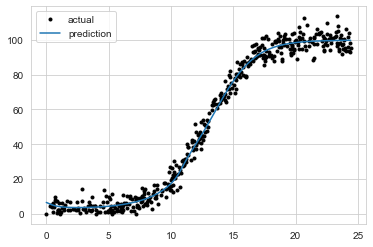

In [43]:
plt.plot(x, y,'k.', label='actual')
plt.plot(x, model.predict(x), label='prediction')
plt.legend();

In [44]:
train_eval = model.evaluate(x_train, y_train, verbose=0)
print(train_eval)

test_eval = model.evaluate(x_test, y_test, verbose=0)
print(test_eval)

16.58287811279297
18.067087173461914


### References

1. https://github.com/kevindooley/fundamentals-data-analysis-project/blob/master/tips_dataset.ipynb
2. https://seaborn.pydata.org/generated/seaborn.relplot.html
3. https://stackoverflow.com/questions/32067054/remove-rows-of-zeros-from-a-pandas-series
4. wiki
5. https://machinelearningmastery.com/linear-regression-for-machine-learning/
6. https://realpython.com/linear-regression-in-python/
7. https://www.awea.org/wind-101/basics-of-wind-energy#:~:text=When%20the%20wind%20blows%20past,a%20generator%20that%20produces%20electricity.
8. https://www.seai.ie/technologies/wind-energy/
9. https://www.energy.gov/eere/wind/how-do-wind-turbines-work#:~:text=Wind%20turbines%20work%20on%20a,a%20generator%2C%20which%20creates%20electricity.
10. https://www.sciencedirect.com/science/article/abs/pii/S0306261919304970
11. file:///C:/Users/doolek3/Downloads/NY-Wind-Energy-Guide-1.pdf
12. https://www.blue-pencil.ca/data-cleansing-what-is-it-and-why-is-it-important/#:~:text=Data%20cleansing%20is%20also%20important,with%20the%20highest%20quality%20information.
13. http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm